# First steps in Deep Learning with Keras

## 0. Linking to google drive

In [2]:
import os

# from google.colab import drive

# drive.mount('drive')

In [3]:

# os.chdir("drive/My Drive/")
# !ls

## 1. Playing with Tensorflow playground

Rendez vous dans un autre onglet de votre navigateur sur la page [http://playground.tensorflow.org/](http://playground.tensorflow.org/). Cette interface vous permet de designer un réseau de neurones sur différents  problèmes artificiels (données générées selon des lois connues) en dimension 2 et de se familiariser avec les capacités de ces modèles. Il y a 4 jeux de données, (Les deux couronnes, Le XOR, les 2 gaussiennes, et les spirales). Vous pouvez tirer au hasard un échatillon de données pour le jeu de données choisi, choisir un bruit, et specifier la taille de la base d'apprentissage.  


1.   Étude des "bonnes" caractéristiques pour un problème donné

* Sélectionnez le jeu de données des 2 gaussiennes.
* Choisissez un réseau sans couche cachée. Réglez les paramètres tels que le pas de gradient (learning rate) et la fonction d'activation jusqu'à ce que voua rriviez à un bonne sépartion des 2 classes.
* Selectionnez maintenant un autre jeu de données, le XOR. Votre modèle de peut pas obtenir de bonnes performances. Ajoutez en entrée du modèle de nouvelles caractéristiques comme $x_1 x_2$ et réentrainez votre modèle.
* Testez ce modèle sur le jeu de données des deux couronnes.
* Maintenant pour ce dernier jeu de données, enlevez la caracteristique $x_1 x_2$ et rajoutez les caraceristiques $x_1^2$ et $x_2^2$.
* Réapprenez puis testez ce modèle en ajustant les hyperparamètres sur le jeu de données XOR. Que concluez vous ?
* Cherchez à construire maintenant un modèle de réseau de neurones capable de bien fntionner sur les deux jeux de données XOR et Les Deux couronnes.

2. Réglage du pas de gradient et des fonctions d'activation

Sur un problème de votre choix mettez en évidence le role du pas de gradient et les possibilités de divergence de l'apprentissage de votre modèle, ainsi que le role des fonctions d'activation (par ex. Relu vs Tanh).



3. Surapprentissage

Mettez en évidence un phénomène de surapprentissage.

* Par exemple sélectionnez le jeu de données des 2 gaussiennes, augmentez le niveau de bruit pour que les données deviennent non linéairement séparables pour quelques points seulement et utilisez des classifieurs complexes (plusieurs couches cachées, 5 à 8 neurones sur toutes les couches).

* Notez les loss en train et en test dans différentes configurations. Testez des fonctions d'activation linéaires, soit tanh, soit relu. Qu'observez vous ?

4. La régularisation L2 est une technique classiquement utilisée pour éviter les problèmes de surapprentissage. Sur un cas de surapprentissage que vous avez identifié essayez de régler la régularisation pour étudier si vous pouvez l'éviter.





## 2. Useful docs

### Notebooks

Allez voir
- http://dichotomies.fr/2015/informatique/info1/cours/debuter-avec-les-notebooks/
- https://blog.wax-o.com/2014/04/tutoriel-un-guide-pour-bien-commencer-avec-markdown/

### Managing Plots

* You need to import pyplot for plotting curves and graphics
* The following command *%matplotlib inline* makes the plots will appear in this webpage
* If you want to save plots on a machine without display (e.g. cluster etc) you mist add the command *matplotlib.use('Agg')* between the two following commands.


In [4]:
# use Matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

### Deep learning with Keras

#### First steps with Keras

- Doc keras :https://keras.io/
- The Sequential model : https://keras.io/getting-started/sequential-model-guide/#getting-started-with-the-keras-sequential-model
- A richer framework : https://keras.io/getting-started/functional-api-guide/

#### Autres Toolkits et package

- Lasagne : Langage *de haut niveau* comme keras


NB : Lasagne et Keras utilisent indifférement un backend parmi Theano (Univ. Montreal) et Tensorflow (Google)

- Theano :  le package de l'Univ. de Montréal

- Tensorflow :  le package Google

- Caffe : très spécialisé images

- Pytorch : la plateforme de Facebook

- ...


## 3. Importing Mnist dataset (and normalizing it)

In [5]:
from keras.datasets import mnist
import numpy as np
from keras import utils


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

nb_classes = 10

2024-05-17 08:11:07.229009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# On transforme les entrée en les vectorisant et on les normalise simplement (on sait que les pixels ont des valeurs entre 0 ert 255)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


In [7]:
# On transforme les sorties (numéros de classe) en des vecteurs de type one-hot-code

y_train =  utils.to_categorical(Y_train, nb_classes)
y_test = utils.to_categorical(Y_test, nb_classes)

#### Questions

* Combien y-a-t-il de données d'apprentissage ? de test ?
* Quelle est la dimension des données ?
* Quelle est la dimension de la sortie du réseau de neurones ?

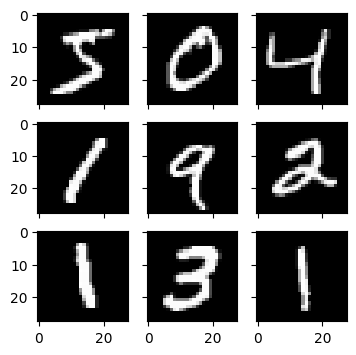

In [8]:
# Affichage de quelques images

# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

## 4. Learning a MLP for Mnist classification


In [9]:
# Import from Keras

from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import metrics

### Creation d'un modèle

On ajoute les couches une à une. Ici un modèle qui
- prend en entrée un vecteur de dimension 784 (une image Mnist 28x28 bectorisée)
- transforme l'entrée en un vecteur de dimension 64 avec une couche totalement connectée (Dense), suivie d'une activation de type Rectified Linear Unit
- Transforme la sortie de la couche précédente (de dimension 64) en un vecteur de dimension 10 avec une autre couche dense
- Transforme le vecteur de dimension 10 en un autre vecteir de dimension 10 avec la fonction d'activation softmax

Puis on compile le modèle en précisant
- le critère d'optimisation, le loss
- la routine d'optimisation, l'optimizer
- les métriques additionnelles que l'on va calculer diffrentes du loss


In [10]:

model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['acc'])


### Affichage de la structure du modèle

Expliquez les différentes éléments de chacune des lignes affichées par la commande suivante.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Question

* Expliquez les nombres de paramètres indiquées dans le résumé du modèle

### On peut maintenant apprendre le modèle avec la méthode *fit*, en précisant
- La base d'apprentissage = les deux premiers paramètres
- le nombre d'itérations d'apprentissage
- la taille des minibatchs
- un ensemble de validation (soit d'autres jeux de données soit on utilise un pourcentage du train).
On aurait pu utiliser: *validation_data=(x_test, y_test),* comme paramètre de la méthode *fit*
- le niveau de verbosité de l'affichage

In [12]:
h = model.fit(x_train, y_train,
              epochs=2,
              batch_size=16,
              verbose =1,
              validation_split=0.33)

Epoch 1/2
2513/2513 [==============================] - 13s 5ms/step - loss: 0.0137 - acc: 0.9098 - val_loss: 0.0086 - val_acc: 0.9430
Epoch 2/2
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0069 - acc: 0.9558 - val_loss: 0.0068 - val_acc: 0.9558


#### Questions

* Sur combien de données le réseau de neurones est-il effectivement appris ?
* A quoi sert la base de validation ?

#### Questions

* Pensez vous que le modèle a bien appris la tâche à réaliser ?
* Pourquoi ?

### On peut maintenant évaluer la performance du modèle sur la base de test

In [13]:
score = model.evaluate(x_test, y_test, verbose =2, batch_size=16)

print (score)

625/625 - 1s - loss: 0.0059 - acc: 0.9621 - 1s/epoch - 2ms/step
[0.005944536533206701, 0.9621000289916992]


### Historique

On peut récupérer des informations sur l'apprentissage dans *h*, variable retournée par l'appel à *fit*

Le code suivant prend un historique et affiche des courbes d'apprentissage, une pour le loss utilisé pour l'optmisation, l'autre pour l'accuracy


In [14]:
def plot_learning_curves(history):
    #print history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


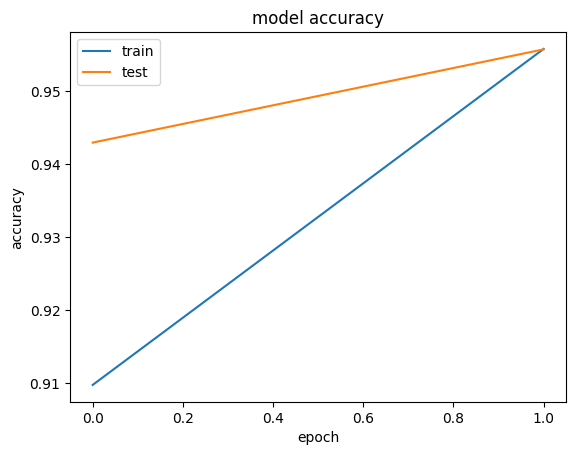

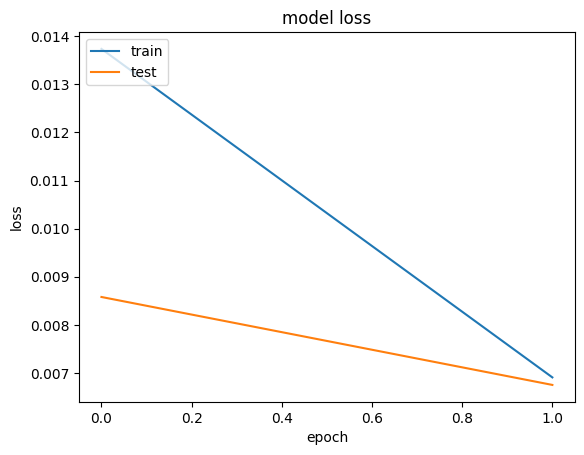

In [15]:
plot_learning_curves(h)

#### Questions

* Que devrait-on observer si le modèle a bien été appris ?

* Reproduisez l'expérience ci-dessus mais en changeant quelques éléments tels que: utiliser un loss *categorical_crossentropy* plutot que *mse*, un optimizer *adadelta* plutot que `adam`,  changer la taille du *batch_size* etc. Quelle conclusion en tirez vous ?

### L'API : une autre façon (plus permissive) de construire un modèle

On créé ci-dessous un modèle équivalent à celui créé plus haut mais d'une autre façon, qui autorise la construction de modèles enchainant des couches d'une facon plus complexe que juste un empilement (modèles avec branches parallèles, avec plusieurs entrées, plusieurs sorties...)

In [16]:
# Import from Keras

from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import metrics

In [17]:

i = Input(shape = (784,))
x= Dense(64, input_dim=784, activation='relu')(i)
x = Dense(64, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model2 = Model(inputs = i, outputs = out)

model2.compile(loss='mse',
              optimizer='adam',
              metrics=['acc'])


In [18]:
h = model2.fit(x_train, y_train,
              epochs=2,
              batch_size=16,
              verbose =1,
              validation_split=0.33)

Epoch 1/2
2513/2513 [==============================] - 13s 5ms/step - loss: 0.0136 - acc: 0.9106 - val_loss: 0.0079 - val_acc: 0.9485
Epoch 2/2
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0070 - acc: 0.9552 - val_loss: 0.0072 - val_acc: 0.9536


### Callbacks

Permet de programmer la sauvegarde des modèles a chaque itération, l'adaptation du learning rate, une procédure de early stopping etc

Voir <https://keras.io/callbacks/>



In [19]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [20]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, verbose=1, mode='auto')
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)

h = model.fit(x_train, y_train,
              epochs=2,
              batch_size=16,
              verbose =1,
              validation_split=0.33,
              callbacks=[es]) # vous pouvez utiliser plusieurs callbacks avec par exemple callbacks =[es, lr]


Epoch 1/2
2513/2513 [==============================] - 11s 4ms/step - loss: 0.0052 - acc: 0.9663 - val_loss: 0.0064 - val_acc: 0.9579
Epoch 2/2
2513/2513 [==============================] - 11s 4ms/step - loss: 0.0043 - acc: 0.9732 - val_loss: 0.0057 - val_acc: 0.9633


### D'autres callbacks (passer en première lecture)

In [21]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
filepath = "my_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=2)

callbacks = [time_callback, checkpoint]

In [22]:

h = model.fit(x_train, y_train,
              epochs=20,
              batch_size=16,
              verbose =1,
              validation_split=0.33,
              callbacks=callbacks) # vous pouvez utiliser plusieurs callbacks avec par exemple callbacks =[es, lr]


Epoch 1/20
2513/2513 [==============================] - 11s 5ms/step - loss: 0.0037 - acc: 0.9768 - val_loss: 0.0060 - val_acc: 0.9609
Epoch 2/20
2510/2513 [============================>.] - ETA: 0s - loss: 0.0033 - acc: 0.9790
Epoch 2: val_acc improved from -inf to 0.96349, saving model to my_model.h5
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0033 - acc: 0.9790 - val_loss: 0.0056 - val_acc: 0.9635
Epoch 3/20
  19/2513 [..............................] - ETA: 13s - loss: 0.0015 - acc: 0.9967    

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2513/2513 [==============================] - 10s 4ms/step - loss: 0.0029 - acc: 0.9818 - val_loss: 0.0059 - val_acc: 0.9627
Epoch 4/20
2503/2513 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 0.9834
Epoch 4: val_acc improved from 0.96349 to 0.96616, saving model to my_model.h5
2513/2513 [==============================] - 11s 4ms/step - loss: 0.0027 - acc: 0.9834 - val_loss: 0.0055 - val_acc: 0.9662
Epoch 5/20
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0026 - acc: 0.9840 - val_loss: 0.0053 - val_acc: 0.9671
Epoch 6/20
2501/2513 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 0.9861
Epoch 6: val_acc improved from 0.96616 to 0.96849, saving model to my_model.h5
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0023 - acc: 0.9861 - val_loss: 0.0050 - val_acc: 0.9685
Epoch 7/20
2513/2513 [==============================] - 10s 4ms/step - loss: 0.0021 - acc: 0.9872 - val_loss: 0.0053 - val_acc: 0.9675
Epoch 8/20
250

## 5. Saving and retrieving models

### Learning a MLP

In [23]:
# If needed relearn a MLP with for instance this code

model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=16)
score = model.evaluate(x_test, y_test, batch_size=16)
print (score)


Epoch 1/2
3750/3750 [==============================] - 14s 3ms/step - loss: 2.2458 - accuracy: 0.1341
Epoch 2/2
625/625 [==============================] - 2s 3ms/step - loss: 2.1019 - accuracy: 0.3157
[2.1018826961517334, 0.3156999945640564]


### Saving a model and reloading it

In [24]:
from keras.models import load_model

 # Saving the model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# Retrieving the model
model = load_model('my_model.h5')

score = model.evaluate(x_test, y_test, batch_size=16)
print (score)

625/625 [==============================] - 2s 2ms/step - loss: 2.1019 - accuracy: 0.3157
[2.1018826961517334, 0.3156999945640564]


## 6. Embedding Keras in SKLearn (Grid Search / Cross Validation)

In [48]:
# !pip install tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [45]:
# !pip3.10 install scikeras

You should consider upgrading via the '/usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [50]:
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import Input, Lambda # merge etait import aussi mais conflit de version de keras et pas utile pour le code
import keras.backend as K

from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

def create_model_Mnist(optimizer='rmsprop', input_datadim = 784, init='glorot_uniform', nb_hid1= 20, do_rate= 0.5 ):
    # create model

    Inputs = Input(shape=(input_datadim,))
    H = Dense(nb_hid1, input_dim=784, activation='relu')(Inputs)
    H = Dropout(do_rate)(H)
    H = Dense(nb_hid1, activation='relu')(H)
    H = Dropout(do_rate)(H)
    O = Dense(10, activation='softmax')(H)
    m = Model(inputs = Inputs, outputs = O)
    m.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
    m.summary()
    return m

model = KerasClassifier(init = ['glorot_uniform'], nb_hid1 = [100], do_rate=[0, 0.5], build_fn=create_model_Mnist)

optimizers = ['rmsprop']
init = ['glorot_uniform']
epochs = [50]
V_nb_hid1 = [100]
DO_rate=[0, 0.5]

param_grid = dict(optimizer=optimizers, init=init,  nb_hid1=V_nb_hid1, do_rate= DO_rate)

print (param_grid)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train, epochs = 50, callbacks=[es], verbose=2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))


/var/folders/nw/22q9mcxx4hdbcc2_dnjjh6jh0000gn/T/ipykernel_1160/3859033129.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(init = ['glorot_uniform'], nb_hid1 = [100], do_rate=[0, 0.5], build_fn=create_model_Mnist)


{'optimizer': ['rmsprop'], 'init': ['glorot_uniform'], 'nb_hid1': [100], 'do_rate': [0, 0.5]}
Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_159 (Dense)           (None, 100)               78500     
                                                                 
 dropout_100 (Dropout)       (None, 100)               0         
                                                                 
 dense_160 (Dense)           (None, 100)               10100     
                                                                 
 dropout_101 (Dropout)       (None, 100)               0         
                                                                 
 dense_161 (Dense)           (None, 10)                1010      
                              

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
  File "/usr/local/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 167, in fit
AttributeError: module 'keras.losses' has no attribute 'is_categorical_crossentropy'


## 7. To Do : Mise au point d'un classifieur profond sur les données Mnist (Passer en première lecture)

https://www.kaggle.com/c/digit-recognizer


Vous devez :

- Vous enregistrer sur Kaggle
- Récupérer les données de la compétition digit-recognizer
- Soumettre des prédictions sur les données de test.
- Me fournir par mail d'ici la prochaine séance votre login Kaggle et la performance que vous avez obtenue.

Pour cela vous pourrez suivre, notamment, les pistes évoquées ci-dessous (non exclusives).

Dans tous les cas vous ferez attention à avoir une bonne estimation de la performance en généralisation avant de soumettre un RUN sur Kaggle.

### Piste 1 : Accroître la quantité de données et leur variabilité  

- En bruitant les données (bruit à définir)
- En rajoutant les images miroirs
- En utilisant les pistes décrites ici  http://leon.bottou.org/projects/infimnist
Vous pourrez utiliser [ImageDataGenerator](https://keras.io/preprocessing/image/) de Keras.

### Piste 2 : Exploiter la technique du dropout

En vous inspirant de résultats et d'indications publiés dans
https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

La couche de Dropout de Keras est définie [ici](https://keras.io/layers/core/).
